### Step-1:Dataset creation

In [1]:
import pandas as pd

In [17]:
df = pd.read_csv("happy.csv")
df.sample(5)

,qoutes,lable
23,பின்பற்றுவது மிகுந்த அறிவு ஆகும் மோசடி பேசுவது...,1
11,மகிழ்ச்சி அனைவருக்கும் அனுபவிக்க வேண்டிய உண்மை...,0
30,மோசடியான கூட்டத்தில் நிலைத்தால் மோசடியான பாதை ...,1
33,மிகுந்த திட்டத்தின் பின் துன்பம் எப்போதும் வந்...,1
17,மகிழ்ச்சி நம் உள்ளத்தில் விளங்குகின்ற வியக்கமா...,0


In [18]:
df.shape

(39, 2)

### Step2: Pre-processing

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_data(quotes):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(quotes)
    sequences = tokenizer.texts_to_sequences(quotes)
    vocab_size = len(tokenizer.word_index) + 1

    # Pad the sequences to have the same length
    max_sequence_length = max(len(seq) for seq in sequences)
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

    return padded_sequences

X = preprocess_data(df['qoutes'].values)

### Step3: Dataset Preparation

In [22]:
y = df['lable'].values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (39,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(29, 11) (29,)
(10, 11) (10,)


### Step4: Model Creation

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

In [25]:
def layerandnodes(n,l):
    model = Sequential()
    for x in range(l):
        model.add(Dense(n,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',optimizer='RMSprop',metrics='accuracy')
    return model

model = layerandnodes(32,1)

In [26]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

model.fit(X_train,y_train,epochs=100,callbacks=[early_stop])

Epoch 1/100
1/1 [==============================] - 1s 864ms/step - loss: 0.5503 - accuracy: 0.4483
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4352 - accuracy: 0.5517
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3533 - accuracy: 0.6552
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.3096 - accuracy: 0.6897
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.2992 - accuracy: 0.6897
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2922 - accuracy: 0.6552
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 0.2871 - accuracy: 0.6897
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2675 - accuracy: 0.6897
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2698 - accuracy: 0.7241
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2609 - accuracy: 0.7241
Epoch 11/100
1/1 [=

### Step5:Analysis Part-A
8nodes

In [27]:
model1 = layerandnodes(8,1)
model1.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model1.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 758ms/step - loss: 0.6800 - accuracy: 0.3103
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6690 - accuracy: 0.3103
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6440 - accuracy: 0.3448
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6295 - accuracy: 0.3448
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6205 - accuracy: 0.3448
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6146 - accuracy: 0.3793
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6115 - accuracy: 0.3793
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6097 - accuracy: 0.3793
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6082 - accuracy: 0.3793
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6068 - accuracy: 0.3793
Epoch 11/100
1/1 [===

[0.3952171802520752, 0.5]

In [28]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 96        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


16nodes

In [29]:
model2 = layerandnodes(16,1)
model2.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model2.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 733ms/step - loss: 0.3565 - accuracy: 0.5862
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3131 - accuracy: 0.6897
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3088 - accuracy: 0.6897
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2988 - accuracy: 0.6897
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.2735 - accuracy: 0.7241
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.2680 - accuracy: 0.7241
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2620 - accuracy: 0.7241
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2554 - accuracy: 0.7241
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2509 - accuracy: 0.7586
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.2485 - accuracy: 0.7586
Epoch 11/100
1/1 [==========

[0.3934306204319, 0.6000000238418579]

In [30]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                192       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 209 (836.00 Byte)
Trainable params: 209 (836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


64nodes

In [31]:
model3 = layerandnodes(64,1)
model3.fit(X_train,y_train,epochs=100,callbacks=[EarlyStopping(monitor='loss',patience=3)])
model3.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 739ms/step - loss: 0.5236 - accuracy: 0.4483
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5079 - accuracy: 0.4828
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4484 - accuracy: 0.5517
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4275 - accuracy: 0.5517
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4087 - accuracy: 0.5862
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4063 - accuracy: 0.5862
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4025 - accuracy: 0.5862
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3974 - accuracy: 0.5862
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3918 - accuracy: 0.5862
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.3848 - accuracy: 0.5862
Epoch 11/100
1/1 [====

[0.6012957096099854, 0.4000000059604645]

In [32]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


128nodes

In [33]:
model4 = layerandnodes(128,1)
model4.fit(X_train,y_train,epochs=100,callbacks=[EarlyStopping(monitor='accuracy',patience=3)])
model4.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 953ms/step - loss: 0.4432 - accuracy: 0.5517
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3659 - accuracy: 0.6207
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 0.3561 - accuracy: 0.6207
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2693 - accuracy: 0.6897
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3147 - accuracy: 0.6552
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2240 - accuracy: 0.7241
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.1279 - accuracy: 0.8621
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 0.1721 - accuracy: 0.7931
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.1979 - accuracy: 0.7931
Epoch 10/100
1/1 [==============================] - 0s 265ms/step - loss: 0.4549 - accuracy: 0.4000


[0.4549318253993988, 0.4000000059604645]

In [34]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1536      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


256nodes

In [35]:
model5 = layerandnodes(256,1)
model5.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model5.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 926ms/step - loss: 0.5464 - accuracy: 0.4483
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4236 - accuracy: 0.4483
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4767 - accuracy: 0.5172
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3046 - accuracy: 0.6552
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.2359 - accuracy: 0.7586
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2494 - accuracy: 0.6897
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1778 - accuracy: 0.7931
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.1241 - accuracy: 0.8621
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 0.1399 - accuracy: 0.7931
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0942 - accuracy: 0.8966
Epoch 11/100
1/1 [==

[0.5186878442764282, 0.5]

In [36]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               3072      
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


512nodes

In [37]:
model6 = layerandnodes(512,1)
model6.fit(X_train,y_train,validation_split=0.20,epochs=100,callbacks=[early_stop])
model6.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.3442 - accuracy: 0.6522 - val_loss: 0.1667 - val_accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 0s 55ms/step - loss: 0.3459 - accuracy: 0.6087 - val_loss: 0.4993 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 56ms/step - loss: 0.3260 - accuracy: 0.6522 - val_loss: 0.4981 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 45ms/step - loss: 0.1989 - accuracy: 0.7826 - val_loss: 0.4974 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 58ms/step - loss: 0.1839 - accuracy: 0.7826 - val_loss: 0.3313 - val_accuracy: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0885 - accuracy: 0.9130 - val_loss: 0.3305 - val_accuracy: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0882 - accuracy: 0.9130 - val_loss: 0.3324 - val_accuracy: 0.6667
Epoch 8/100
1/1 [=====

[0.5579858422279358, 0.4000000059604645]

In [38]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               6144      
                                                                 
 dense_13 (Dense)            (None, 1)                 513       
                                                                 
Total params: 6657 (26.00 KB)
Trainable params: 6657 (26.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1028nodes

In [39]:
model7 = layerandnodes(1028,1)
model7.fit(X_train,y_train,validation_split=0.20,epochs=100,callbacks=[early_stop])
model7.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 998ms/step - loss: 0.1642 - accuracy: 0.6522 - val_loss: 0.4718 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 71ms/step - loss: 0.2796 - accuracy: 0.6957 - val_loss: 0.3706 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 66ms/step - loss: 0.2748 - accuracy: 0.6522 - val_loss: 0.3333 - val_accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 68ms/step - loss: 0.1163 - accuracy: 0.8261 - val_loss: 0.3335 - val_accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0879 - accuracy: 0.9130 - val_loss: 0.3334 - val_accuracy: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0877 - accuracy: 0.9130 - val_loss: 0.3334 - val_accuracy: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 71ms/step - loss: 0.0876 - accuracy: 0.9130 - val_loss: 0.3334 - val_accuracy: 0.6667
Epoch 8/100
1/1 [==

[0.537082850933075, 0.4000000059604645]

In [40]:
model7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1028)              12336     
                                                                 
 dense_15 (Dense)            (None, 1)                 1029      
                                                                 
Total params: 13365 (52.21 KB)
Trainable params: 13365 (52.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


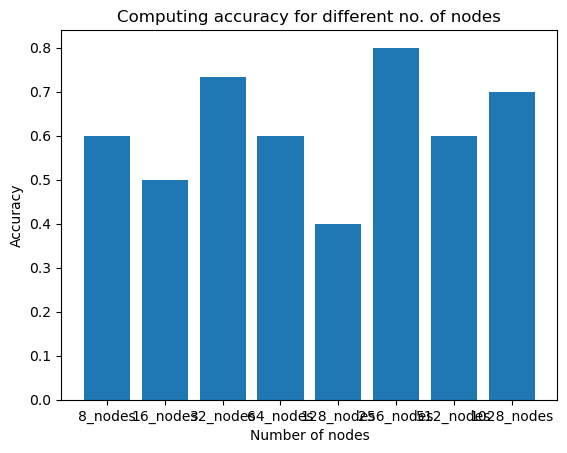

In [41]:
import matplotlib.pyplot as plt
# creating the barchart
bar={'8_nodes':0.6000,'16_nodes':0.5000,'32_nodes':0.7333,'64_nodes':0.6000,'128_nodes':0.4000,'256_nodes':0.8000,'512_nodes':0.6000,'1028_nodes':0.6999}
nodes = list(bar.keys())
acc = list(bar.values())

# creating the bar plot
plt.bar(nodes, acc)

plt.xlabel("Number of nodes")
plt.ylabel("Accuracy")
plt.title("Computing accuracy for different no. of nodes")
plt.show()

### Step-5 Analysis part-b

In [42]:
model9 = layerandnodes(32,2)
model9.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model9.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 998ms/step - loss: 0.4050 - accuracy: 0.5517
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 0.3513 - accuracy: 0.6207
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2822 - accuracy: 0.7241
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2771 - accuracy: 0.7241
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2587 - accuracy: 0.7241
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.2515 - accuracy: 0.7586
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2424 - accuracy: 0.7586
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2423 - accuracy: 0.7586
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2422 - accuracy: 0.7586
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2421 - accuracy: 0.7586
Epoch 11/100
1/1 [===

[0.498236745595932, 0.5]

In [43]:
model9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                384       
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1473 (5.75 KB)
Trainable params: 1473 (5.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model10 = layerandnodes(32,3)
model10.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model10.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 981ms/step - loss: 0.5243 - accuracy: 0.4483
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4514 - accuracy: 0.5172
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4033 - accuracy: 0.5517
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2864 - accuracy: 0.6897
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2418 - accuracy: 0.7241
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1977 - accuracy: 0.7586
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1731 - accuracy: 0.7931
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1639 - accuracy: 0.8276
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1546 - accuracy: 0.8621
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1549 - accuracy: 0.8621
Epoch 11/100
1/1 [

[0.4886118471622467, 0.5]

In [45]:
model10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                384       
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2529 (9.88 KB)
Trainable params: 2529 (9.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model11 = layerandnodes(32,4)
model11.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model11.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.5523 - accuracy: 0.4483
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 0.5517 - accuracy: 0.4483
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5517 - accuracy: 0.4483
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.4483
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5516 - accuracy: 0.4483
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5514 - accuracy: 0.4483
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5511 - accuracy: 0.4483
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5493 - accuracy: 0.4483
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5389 - accuracy: 0.4483
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4722 - accuracy: 0.4828
Epoch 11/100
1/1 [====

[0.4883781373500824, 0.5]

In [47]:
model11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                384       
                                                                 
 dense_24 (Dense)            (None, 32)                1056      
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model12 = layerandnodes(32,5)
model12.fit(X_train,y_train,epochs=100,callbacks=[early_stop])
model12.evaluate(X_test,y_test)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.3915 - accuracy: 0.3793
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2321 - accuracy: 0.7241
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2179 - accuracy: 0.6897
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1647 - accuracy: 0.8276
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1027 - accuracy: 0.8966
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0643 - accuracy: 0.9310
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0569 - accuracy: 0.8966
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0897 - accuracy: 0.8966
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0447 - accuracy: 0.9655
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 1.0000
Epoch 11/100
1/1 [===

[0.5945562720298767, 0.4000000059604645]

In [49]:
model12.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                384       
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 32)                1056      
                                                                 
 dense_31 (Dense)            (None, 32)                1056      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4641 (18.13 KB)
Trainable params: 4641 

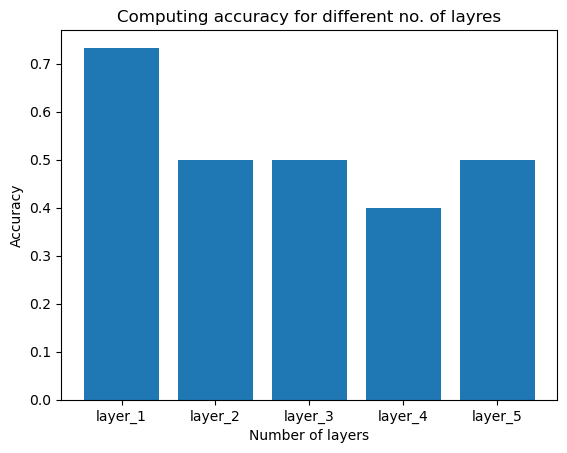

In [50]:
layers={'layer_1':0.7333,'layer_2':0.5000,'layer_3':0.5000,'layer_4':0.4000,'layer_5':0.5000}
nodes = list(layers.keys())
acc = list(layers.values())
plt.bar(nodes, acc)

plt.xlabel("Number of layers")
plt.ylabel("Accuracy")
plt.title("Computing accuracy for different no. of layres")
plt.show()